In [36]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import os
import re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
read_path = '/content/drive/Shareddrives/Diffeomorphisms_&_CNNs/Alex/analysis_saves/'

In [79]:
data_dir_list = [s for s in os.listdir(read_path) if 'cosine' in s]
data_dir_list.sort()
data_dir_list

['layer_13_cosine_similarity.pt',
 'layer_19_cosine_similarity.pt',
 'layer_28_cosine_similarity.pt',
 'layer_36_cosine_similarity.pt',
 'layer_43_cosine_similarity.pt',
 'layer_46_cosine_similarity.pt',
 'layer_49_cosine_similarity.pt']

In [80]:
curves = {}
for dir in data_dir_list:
  curves[dir] = torch.mean(torch.load(read_path + dir, map_location = torch.device('cpu')), dim = (0, -1))

In [81]:
diffeo_amp = torch.linspace(0, 1.5, 20)

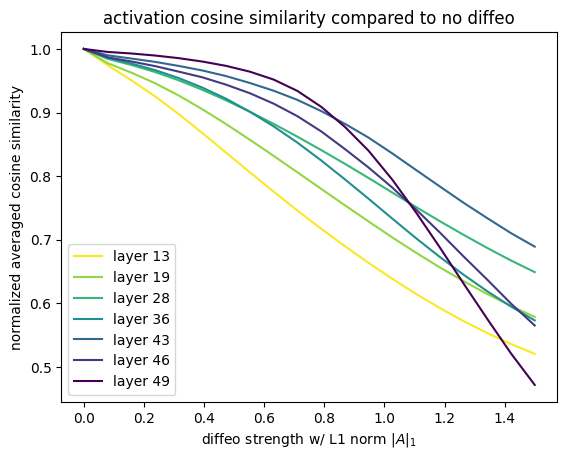

In [82]:
plt.figure()

colors = plt.cm.viridis_r(np.linspace(0,1,len(curves)))

for i, key in enumerate(curves.keys()):
    layer_num = int(re.findall(r'\d+', key)[0])
    plt.plot(diffeo_amp, curves[key], color=colors[i], label = f'layer {layer_num}')
    plt.legend()
    plt.xlabel(r'diffeo strength w/ L1 norm $|A|_1$')
    plt.title('activation cosine similarity compared to no diffeo')
    plt.ylabel(r'normalized averaged cosine similarity')

In [74]:
256*7*7

12544